In [28]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
dimension = 6
num_samples = 600
MU_0 = 0
MU_1 = 1
SIGMA = 1

In [30]:
def generate_time_series(MU_0, MU_1, SIGMA, dimension, num_samples):
    num_samples = int(num_samples / 2)
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(num_samples, dimension)),np.random.normal(MU_1,SIGMA,(num_samples, dimension))))
    return TS

In [31]:
TS = generate_time_series(0, 1, 1, dimension, 600)
TS.shape

(600, 6)

<IPython.core.display.Javascript object>


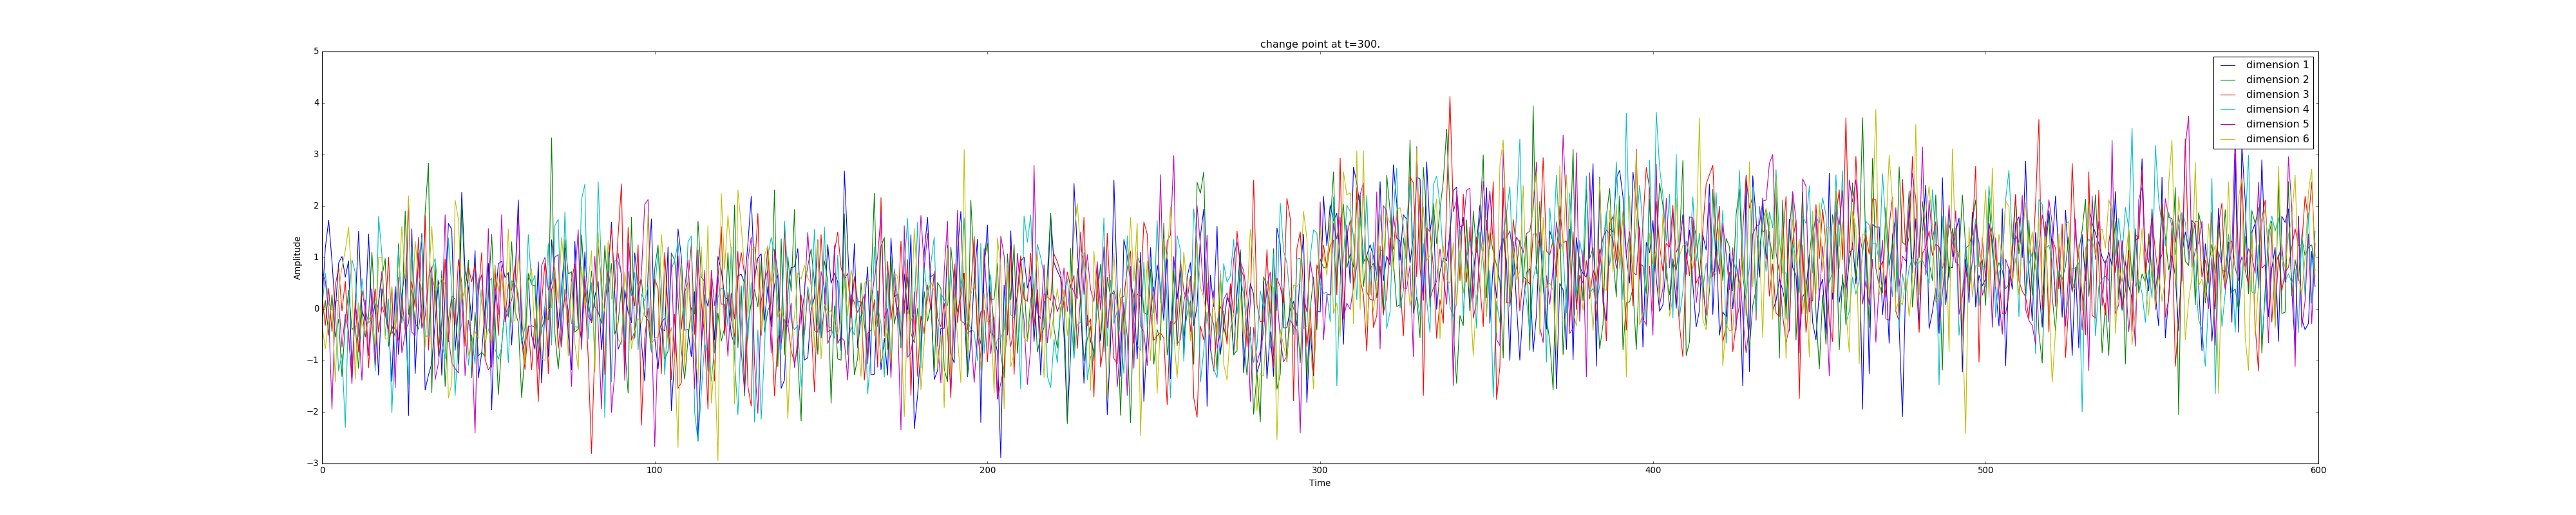

In [32]:
plt.figure(figsize=(50,10))
for k in range(0, dimension):
    plt.plot(TS[:,k], label="dimension {}".format(k+1))
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('change point at t=300.')
plt.legend()
plt.savefig('../images/multivariate_timeseries.png')
plt.show()

In [33]:
plt.close()
mu_bar = (1/num_samples)*np.sum(TS)
sigma_cap = (1/num_samples)*np.sum(np.einsum('ij,ij->i', (TS-MU_0), (TS-MU_0)))

In [34]:
l_h0 = (2*math.pi)**((-dimension*num_samples/2) * (np.absolute(sigma_cap)**(-num_samples/2))* math.e**(-dimension*num_samples/2) )
l_h0

1.0

### Observation
* We are unable to find l_h0 and l_h1 directly as the powers often go very high.  Hence we use the alternate method of finding the likelihood ratio

### Alternate way 

In [35]:
x_bar_k = np.zeros((num_samples-2, dimension))
x_bar_n_minus_k = np.zeros((num_samples-2, dimension))
y_k = np.zeros((num_samples-2, dimension))
w_k = np.zeros(num_samples - 2)

for k in range(1, num_samples -1):
    x_bar_k[k-1] = (1/k)* np.sum(TS[:k+1], axis=0)
    x_bar_n_minus_k[k-1] = (1/(num_samples-k))*np.sum(TS[k+1:], axis=0)
    
    y_k[k-1] = np.sqrt((k*(num_samples-k))/num_samples) * np.subtract(x_bar_k[k-1], x_bar_n_minus_k[k-1])
    
    left = np.sum(np.einsum('ij,ij->i', np.subtract(TS[:k+1], x_bar_k[k-1]), np.subtract(TS[:k+1], x_bar_k[k-1])))
    right = np.sum(np.einsum('ij,ij->i', np.subtract(TS[k+1:], x_bar_n_minus_k[k-1]), np.subtract(TS[k+1:], x_bar_n_minus_k[k-1])))
    w_k[k-1] = (1/(num_samples - 2)) * ( left + right)

In [36]:
print(x_bar_n_minus_k[0], "\n", x_bar_n_minus_k[-1], "\n")
print(x_bar_k[0], "\n", x_bar_k[-1], "\n")
print(TS[0], "\n", TS[-1], "\n")

[ 0.47534412  0.46650364  0.51016088  0.53987472  0.49304227  0.50786955] 
 [ 0.2188351   0.37533111  0.51204482  0.75577056  0.63558789  0.31099385] 

[ 1.2951537  -0.04488104 -0.04443414  0.70759545  1.25777988 -1.083767  ] 
 [ 0.47757293  0.46595341  0.50922716  0.53943313  0.49384436  0.5058664 ] 

[ 0.1078964  -0.21101946  0.27306369  0.01538198  0.70943518 -0.3117966 ] 
 [ 0.43767021  0.75066222  1.02408965  1.51154113  1.27117578  0.6219877 ] 



<IPython.core.display.Javascript object>


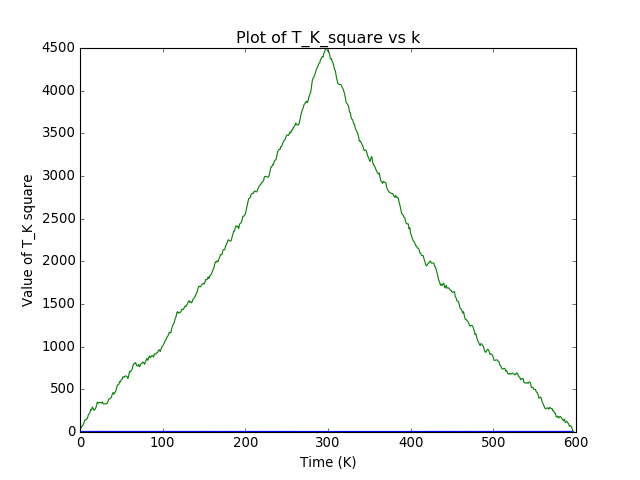

In [37]:
plt.plot(w_k)
plt.title('Values of w_k')
plt.xlabel('K')
plt.ylabel('Value')
plt.savefig('../images/multivariate_w_k.png')

<IPython.core.display.Javascript object>


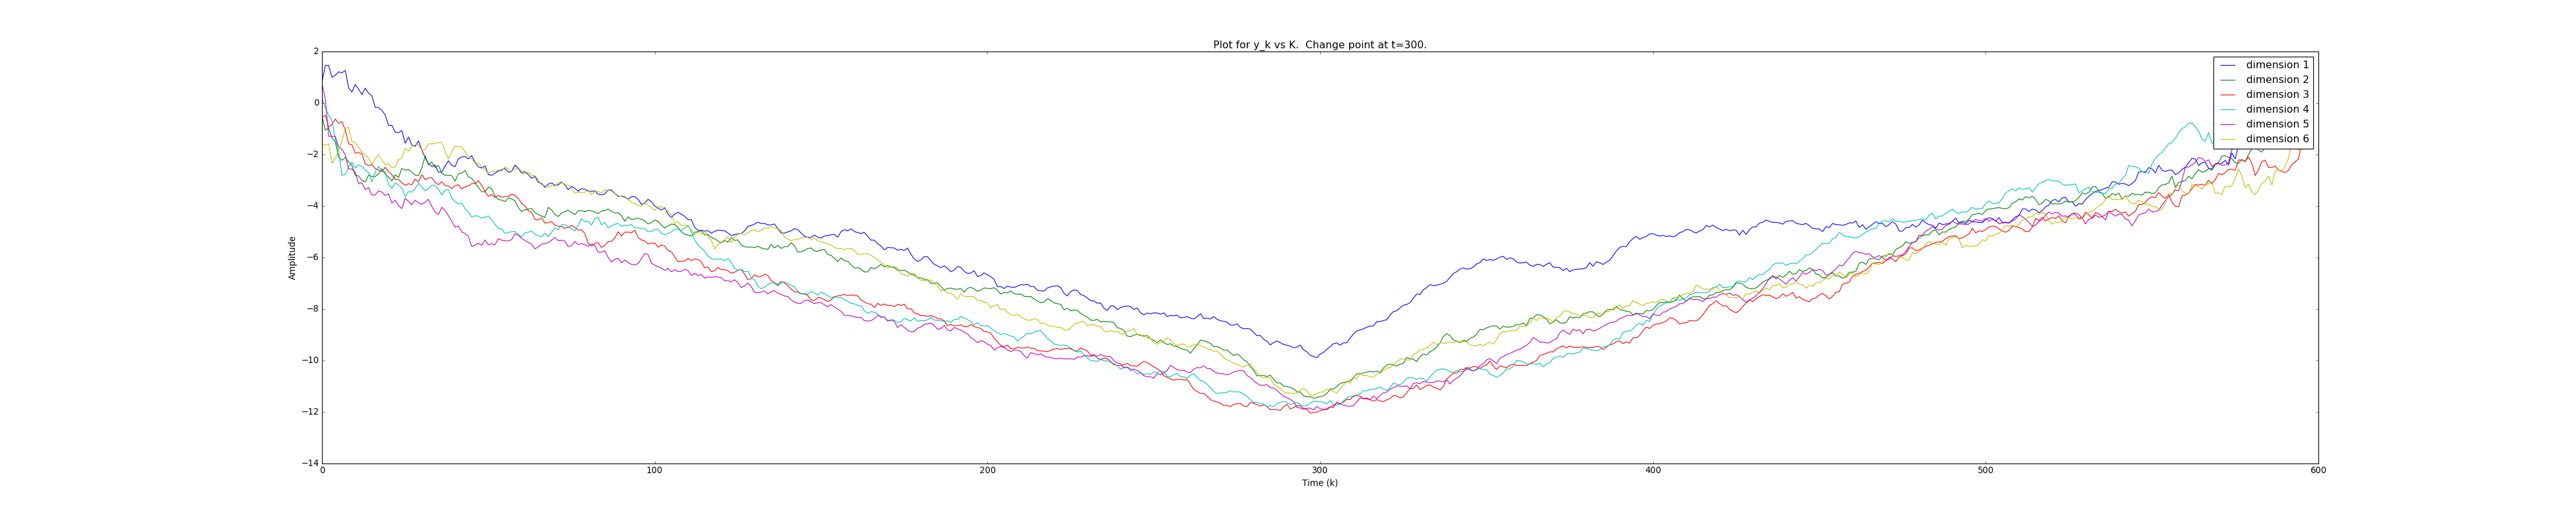

In [38]:
plt.figure(figsize=(50,10))
for k in range(0, dimension):
    plt.plot(y_k[:,k], label="dimension {}".format(k+1))
plt.ylabel('Amplitude')
plt.xlabel('Time (k)')
plt.title('Plot for y_k vs K.  Change point at t=300.')
plt.legend()
plt.savefig('../images/multivariate_y_k.png')
plt.show()

<IPython.core.display.Javascript object>


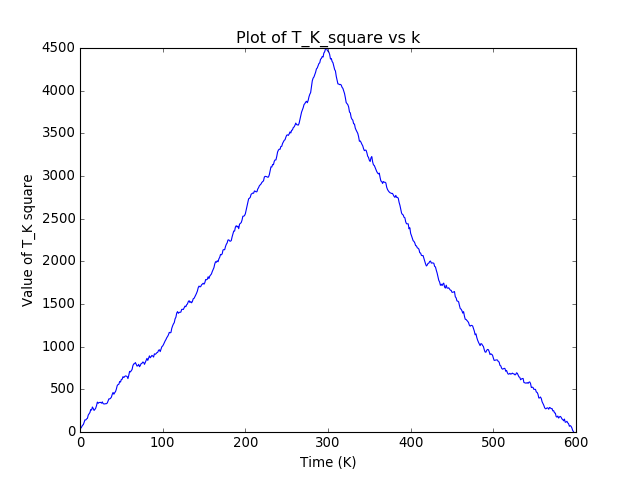

In [40]:
plt.close()
tk_sq = np.einsum('ij,ij->i', y_k, y_k)* w_k

plt.plot(tk_sq)
plt.title('Plot of T_K_square vs k')
plt.xlabel('Time (K)')
plt.ylabel('Value of T_K square')
plt.savefig('../images/multivariate_tk_sq.png')

In [27]:
np.argmax(tk_sq)

300